<a href="https://colab.research.google.com/github/mshea12/568_week12/blob/main/Copy_of_CS550_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# **These next few steps I will show a different way of importing the dataset into the Google Colab UI.**

In [174]:
df = pd.read_csv("/content/sample_data/Sleep_health_and_lifestyle_dataset.csv", index_col = "Person ID")

In [169]:
from google.colab import files

In [96]:
uploaded = files.upload()


Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [101]:
import io
sleep_datafile = pd.read_csv(io.BytesIO(uploaded['Sleep_health_and_lifestyle_dataset.csv']), index_col="Person ID")

# **The next function allows us to see 10 rows of the dataset.**

In [102]:
sleep_datafile.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


# **To make this easier, we will rename the sleep_datafile to df in order to be more productive.**

In [172]:
df = sleep_datafile

# **Firstly we use the shape function in order to examine the data's rows and columns.**

In [175]:
df.shape

(374, 12)

# **Next we use the column function in order to see the list of columns, specifically the target column "Sleep Disorder".**

In [176]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

# **To get a better idea of the data, we will now see what types of data are in each specific column using the types function.**

In [177]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


Below we convert the Blood Pressure attribute into two int attributes, Systolic and Diastolic

In [179]:
df[["Systolic", "Diastolic"]]=df["Blood Pressure"].str.split("/", expand=True)

In [180]:
df["Systolic"]=df["Systolic"].astype('int64')
df["Diastolic"]=df["Diastolic"].astype('int64')

In [181]:
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80


In [182]:
df['Daily Steps'] = np.log10(df['Daily Steps'])

In [183]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,3.820768,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,0.107651,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3.477121,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,3.748188,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,3.845098,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,3.903090,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,4.000000,142.000000,95.000000


# **Now we can expand the graph to see the data populate. Although there are over 300 rows of data, the graph only lets us see a few unless we expand completely.**

In [184]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,3.623249,None,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,4.000000,None,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,4.000000,None,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3.477121,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3.477121,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,3.845098,Sleep Apnea,140,95
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,3.845098,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,3.845098,Sleep Apnea,140,95


# **To go a bit deeper, we can utilize the describe function to see some basic mathmatical data of that column such as mean, min, max, and count of peoples Quality of Sleep.**

In [185]:
df['Quality of Sleep'].describe()

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

# **For the next 10 functions we will explore each column in the dataset to get a better understanding of the data.**

In [186]:
df['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

In [187]:
df['Occupation'].describe()

count       374
unique       11
top       Nurse
freq         73
Name: Occupation, dtype: object

In [188]:
df['Sleep Duration'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [189]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [190]:
df['Stress Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

In [191]:
df['BMI Category'].describe()

count        374
unique         4
top       Normal
freq         195
Name: BMI Category, dtype: object

In [192]:
df['Blood Pressure'].describe()

count        374
unique        25
top       130/85
freq          99
Name: Blood Pressure, dtype: object

In [193]:
df['Heart Rate'].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [194]:
df['Daily Steps'].describe()

count    374.000000
mean       3.820768
std        0.107651
min        3.477121
25%        3.748188
50%        3.845098
75%        3.903090
max        4.000000
Name: Daily Steps, dtype: float64

In [195]:
df['Sleep Disorder'].describe()

count      374
unique       3
top       None
freq       219
Name: Sleep Disorder, dtype: object

# **To get a MUCH faster description of 8 of the columns, you can use the describe function. As you can see, it only shows 8 columns due to the lack of numerical data inside of the other columns.**

In [196]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,3.820768,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,0.107651,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3.477121,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,3.748188,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,3.845098,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,3.903090,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,4.000000,142.000000,95.000000


# **In order to get a visual of the data we will plot it on a graph. As seen below holwever, there is a large discrepancy in the data due to the high number from the Daily Steps column. In this case, we have the option to do subplots. Which we will do in the next step.**

<Axes: xlabel='Person ID'>

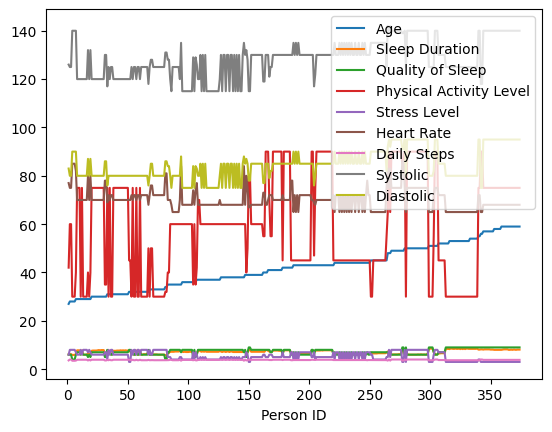

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

# **As seen below, again the max amount of columns to process into graphs at once is 8. Due to the fact that the other columns have no numerical data.**

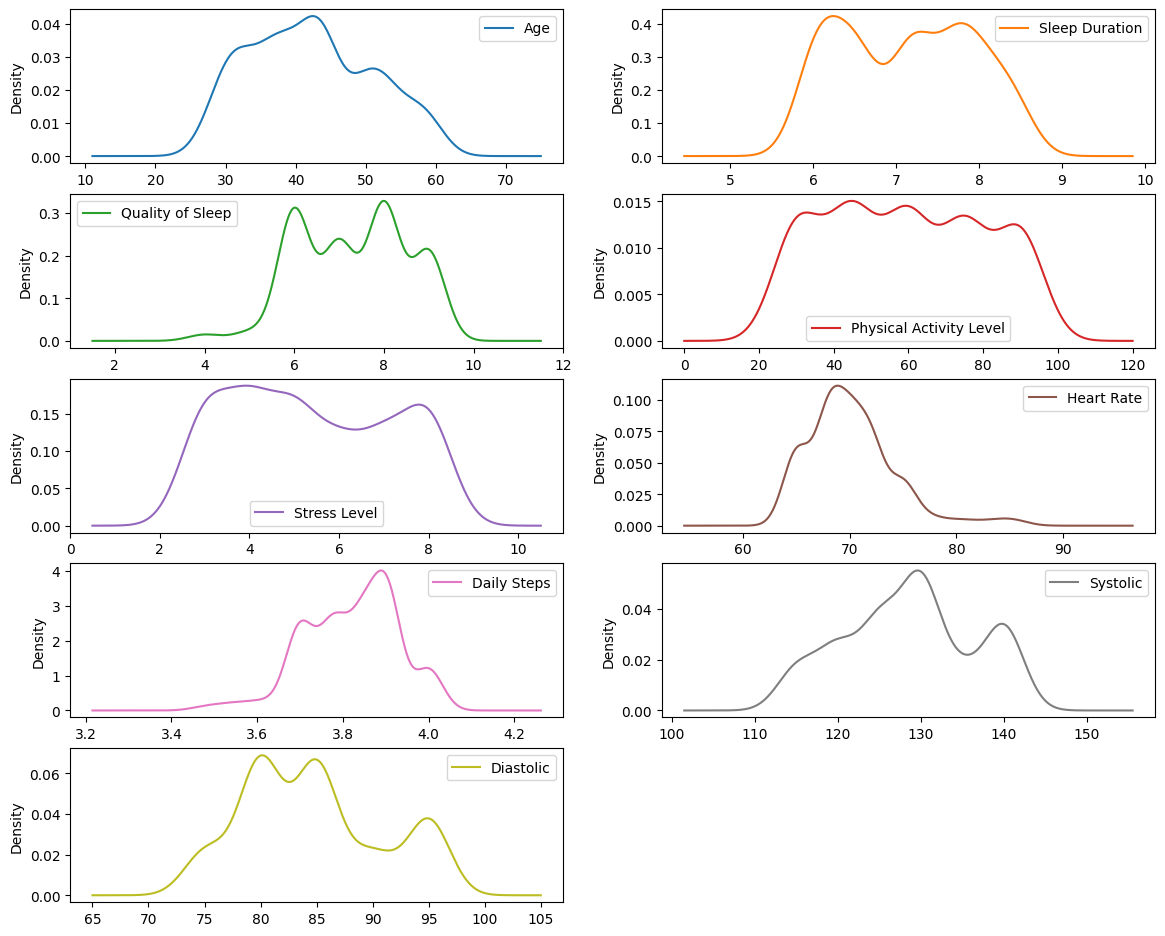

In [198]:
df.plot(kind='density',subplots =True, layout= (6,2),figsize=(14,14),sharex=False)
plt.show()

# **If we wanted to make them more legable, you can further investigate each column by doing a deinsity plot again on just that column.**

<Axes: ylabel='Density'>

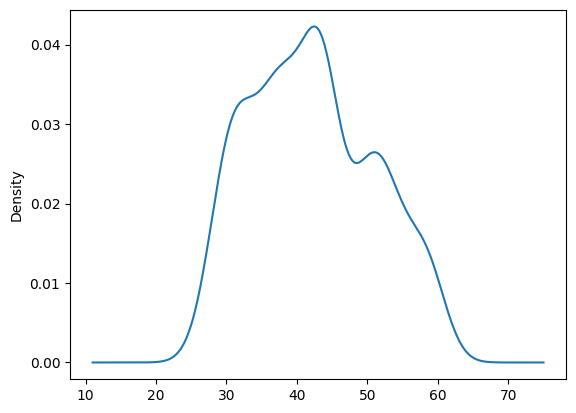

In [128]:
df['Age'].plot.density()

# **You could also show this exact data in the form of a histogram or box plot as you will see next.**

<Axes: ylabel='Frequency'>

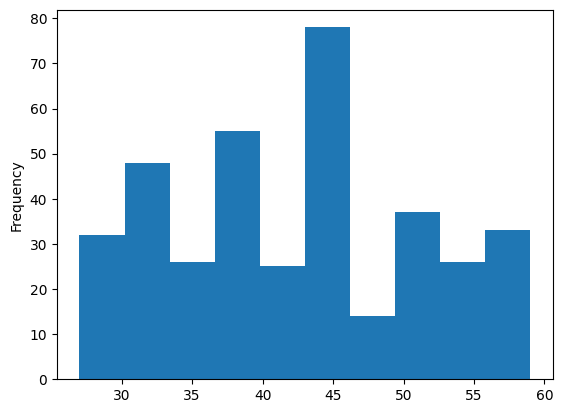

In [129]:
df['Age'].plot.hist()

# **As seen below, there doesn't seem to be many outliers messing up the data when it comes to the Age category.**

<Axes: >

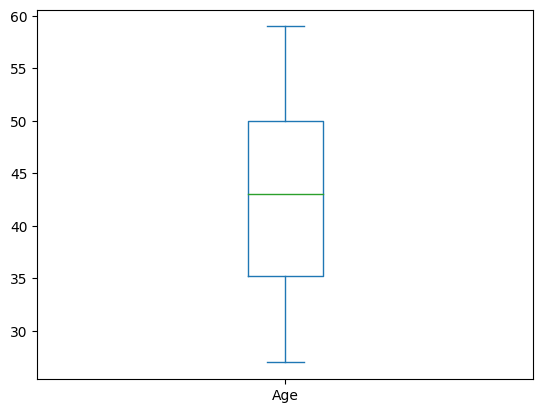

In [130]:
df['Age'].plot.box()

# **In this next section, the goal is to use the groupby function to plot out features for both Abnormal and Normal Values. Ultimately leading to a heatmap using seaborn.**

Insomnia            Axes(0.1,0.559091;0.363636x0.340909)
None           Axes(0.536364,0.559091;0.363636x0.340909)
Sleep Apnea             Axes(0.1,0.15;0.363636x0.340909)
dtype: object

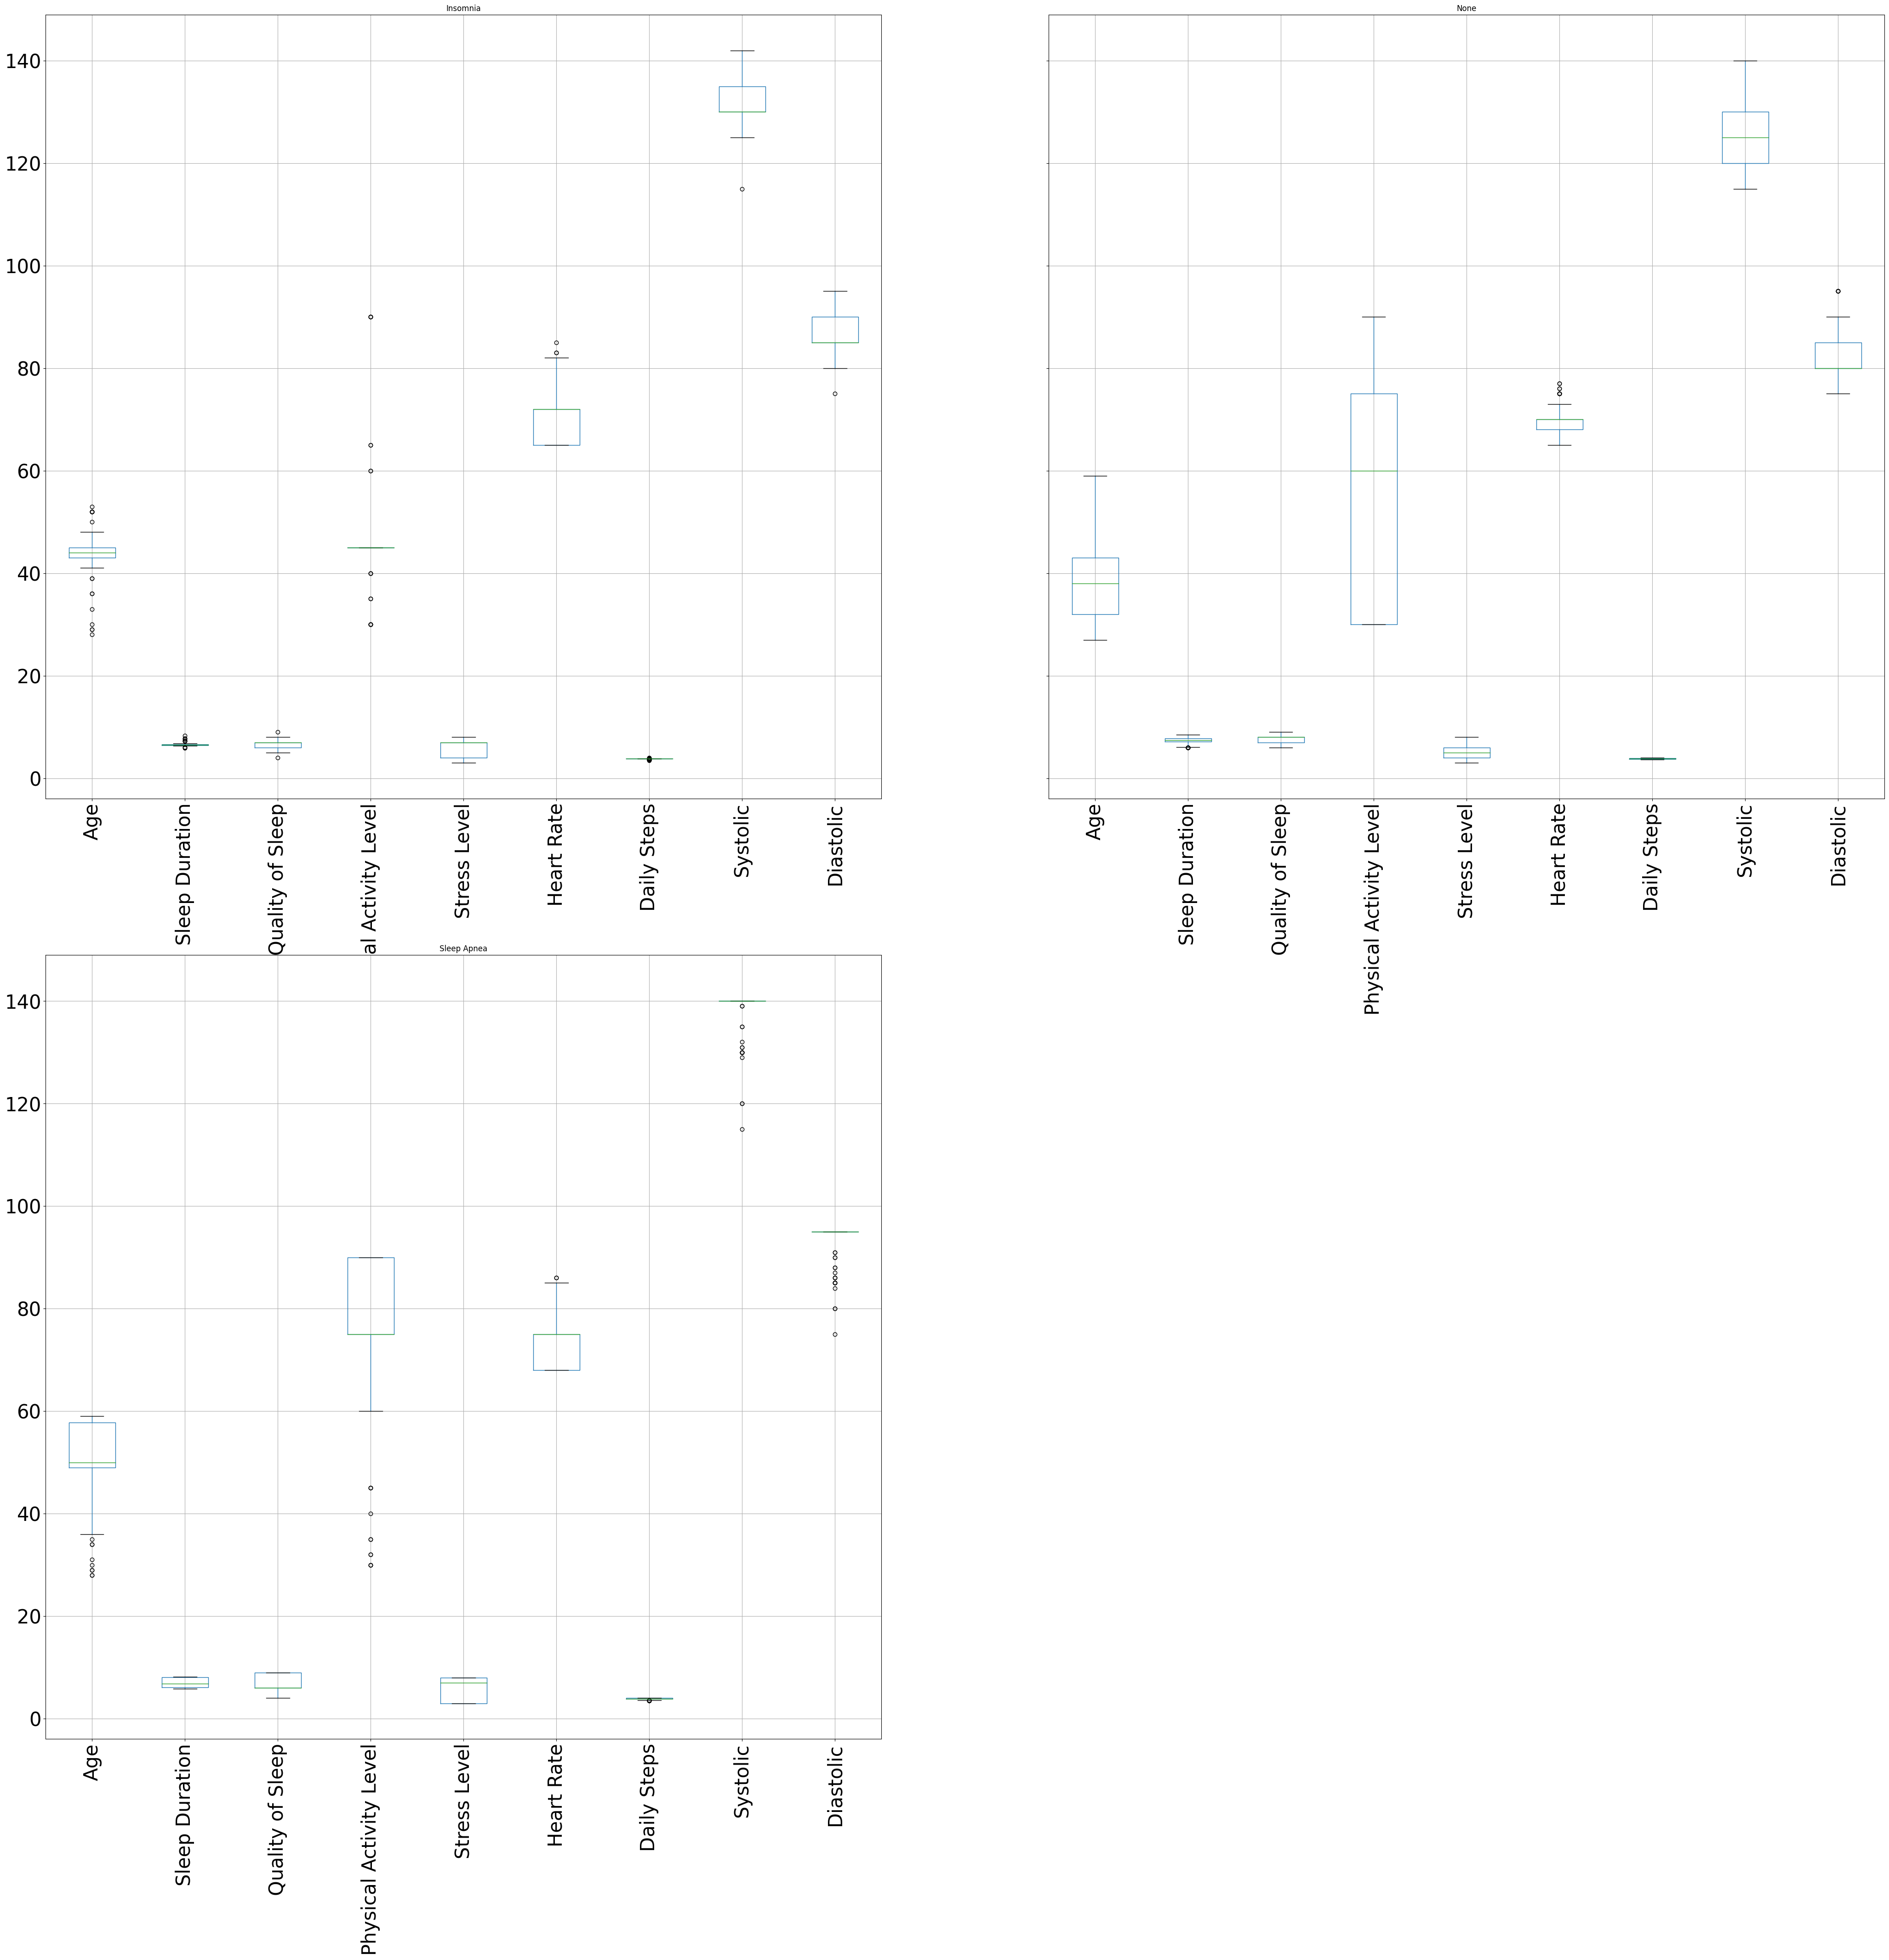

In [199]:
df.groupby('Sleep Disorder').boxplot(fontsize= 30,rot=90,figsize=(50,50), patch_artist=False)

In [154]:
corr_matrix = df.corr()
corr_matrix["Age"].sort_values(ascending=False)

<ipython-input-154-7f64a7bbd1fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Age                        1.000000
Systolic                   0.605878
Diastolic                  0.593839
Quality of Sleep           0.473734
Sleep Duration             0.344709
Physical Activity Level    0.178993
Daily Steps                0.061652
Heart Rate                -0.225606
Stress Level              -0.422344
Name: Age, dtype: float64

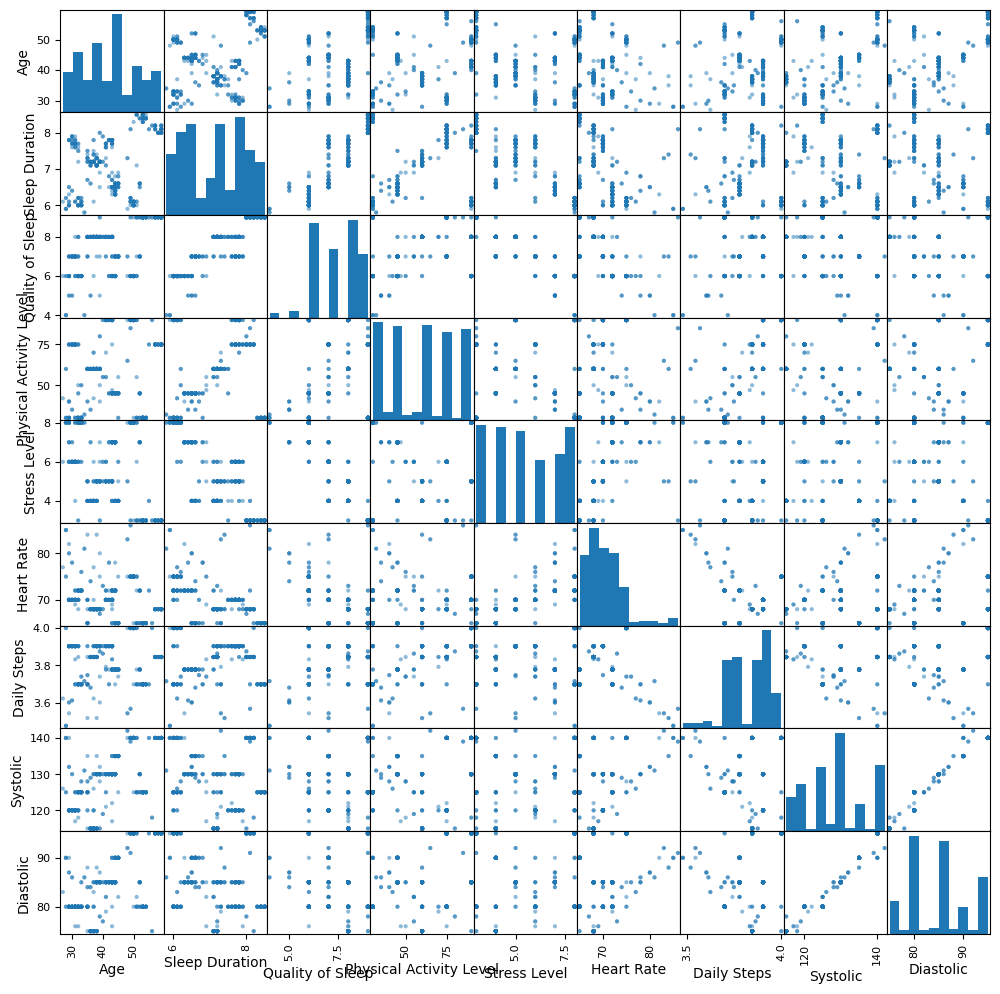

In [155]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

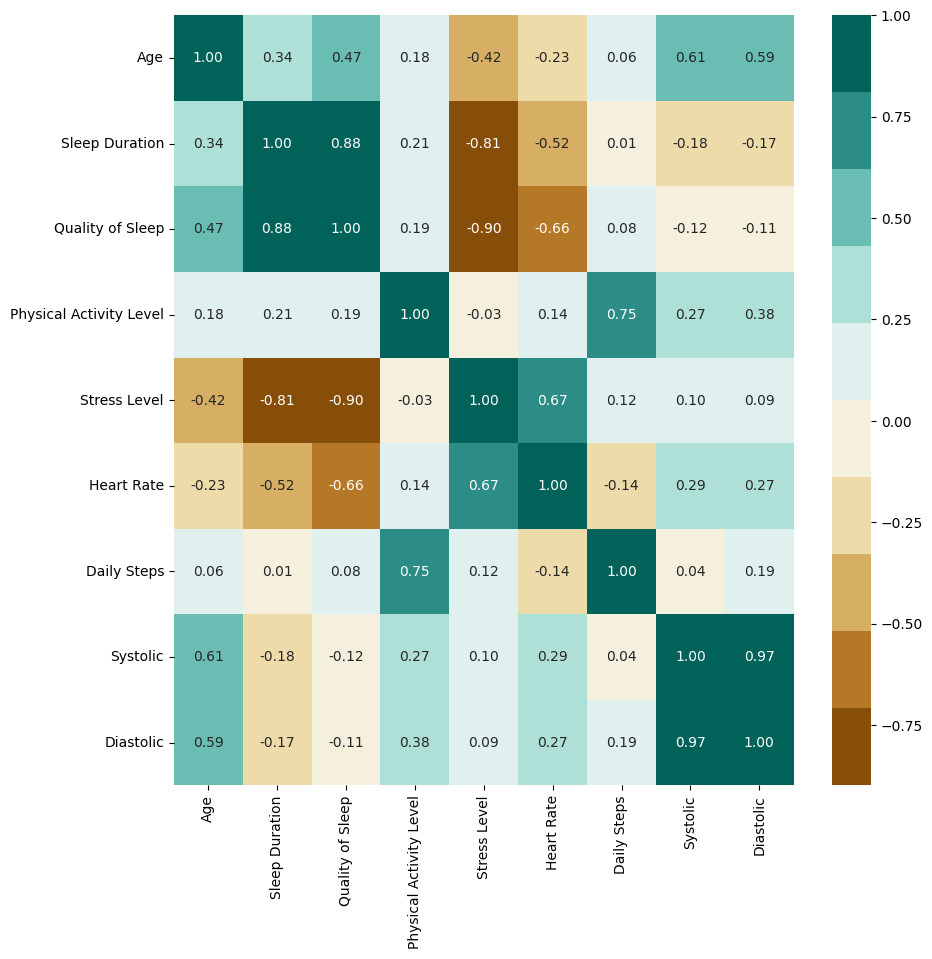

In [156]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show

In [159]:
df["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [206]:
class_mapper = {b'Insomnia':1,b'Sleep Apnea':1,b'Normal':0}
df['Sleep Disorder']=df['Sleep Disorder'].replace(class_mapper)

In [208]:
df["Sleep Disorder"].replace(['None', 'Sleep Apnea', 'Insomnia'], [0,1,1], inplace=True)

In [209]:
df["Sleep Disorder"].value_counts()

0    219
1    155
Name: Sleep Disorder, dtype: int64

In [162]:
df=pd.get_dummies(df, columns=['Occupation'])
df=pd.get_dummies(df, columns=['BMI Category'])
df=pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [165]:
df.head(10)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Gender_Male
Person ID,,,,,,,,,,,,,,,,,,,,,
1,27,6.1,6,42,6,126/83,77,3.623249,0,126,...,0,0,0,1,0,0,0,0,1,1
2,28,6.2,6,60,8,125/80,75,4.000000,0,125,...,0,0,0,0,0,1,0,0,0,1
3,28,6.2,6,60,8,125/80,75,4.000000,0,125,...,0,0,0,0,0,1,0,0,0,1
4,28,5.9,4,30,8,140/90,85,3.477121,1,140,...,1,0,0,0,0,0,0,1,0,1
5,28,5.9,4,30,8,140/90,85,3.477121,1,140,...,1,0,0,0,0,0,0,1,0,1
6,28,5.9,4,30,8,140/90,85,3.477121,1,140,...,0,0,0,1,0,0,0,1,0,1
7,29,6.3,6,40,7,140/90,82,3.544068,1,140,...,0,0,0,0,1,0,0,1,0,1
8,29,7.8,7,75,6,120/80,70,3.903090,0,120,...,0,0,0,0,0,1,0,0,0,1
9,29,7.8,7,75,6,120/80,70,3.903090,0,120,...,0,0,0,0,0,1,0,0,0,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Blood Pressure                   374 non-null    object 
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    float64
 8   Sleep Disorder                   374 non-null    int64  
 9   Systolic                         374 non-null    int64  
 10  Diastolic                        374 non-null    int64  
 11  Occupation_Accountant            374 non-null    uint8  
 12  Occupation_Doctor     

 **Preparing the Data**

---



In [200]:
from sklearn.model_selection import train_test_split
train, test_and_validate = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Sleep Disorder'])

In [201]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['Sleep Disorder'])

In [210]:
print(train.shape)
print(test.shape)
print(validate.shape)

(299, 14)
(37, 14)
(38, 14)


In [203]:
print(train['Sleep Disorder'].value_counts())
print(test['Sleep Disorder'].value_counts())
print(validate['Sleep Disorder'].value_counts())

None           175
Sleep Apnea     62
Insomnia        62
Name: Sleep Disorder, dtype: int64
None           22
Sleep Apnea     8
Insomnia        7
Name: Sleep Disorder, dtype: int64
None           22
Insomnia        8
Sleep Apnea     8
Name: Sleep Disorder, dtype: int64
